# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_Multi/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Start DDPG

In [5]:
def ddpg(agent, n_episodes=1000, max_t=300, print_every=100):
    scores_deque = deque(maxlen=print_every)
    average_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        #scores_window = deque(maxlen=print_every)  # mean scores from most recent episodes
        moving_avgs = []                               # list of moving averages
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)             
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break

        average_scores.append(np.mean(scores))
        #scores_window.append(average_scores[-1])         # save mean score to window
        #moving_avgs.append(np.mean(scores_window))    # save moving average
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_scores[-1]), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_scores[-1]))
        if average_scores[-1] > 30:
            print('\rEnvironment solved in {} episodes with an Average Score of {:.2f}'.format(i_episode, average_scores[-1]))
            return average_scores
            
    return average_scores

In [6]:
def plotscores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### Seach for better hyper parameters value

First with some devault values, the 

| Hyper Parameter | Description |
|-|-|
| _BUFFER_SIZE | replay buffer size |
| _BATCH_SIZE |  minibatch size |
| _GAMMA | discount factor |
| _TAU | for soft update of target parameters |
| _LR_ACTOR | learning rate of the actor |
| _LR_CRITIC | learning rate of the critic |
| _WEIGHT_DECAY | L2 weight decay |
| _mu | Ornstein-Uhlenbeck process |
| _theta | Ornstein-Uhlenbeck process |
| _sigma | Ornstein-Uhlenbeck process |
| _actor_fc1_units | Actor Layer 1 units |
| _actor_fc2_units |  Actor Layer 2 units |
| _critic_fc1_units | Critic Layer 1 units |
| _critic_fc2_units | Critic Layer 2 units |

In [7]:
import pandas as pd
df_hyperparameters = pd.read_csv('./hyperparameters.csv')
df_hyperparameters

,_BUFFER_SIZE,_BATCH_SIZE,_GAMMA,_TAU,_LR_ACTOR,_LR_CRITIC,_WEIGHT_DECAY,_mu,_theta,_sigma,_actor_fc1_units,_actor_fc2_units,_critic_fc1_units,_critic_fc2_units
0,100000,128,0.99,0.001,0.0010,0.0010,0,0,0.15,0.1,128,128,128,128
1,100000,128,0.99,0.001,0.0001,0.0001,0,0,0.15,0.1,128,128,128,128
2,100000,128,0.90,0.001,0.0001,0.0001,0,0,0.15,0.1,128,128,128,128
3,100000,128,0.90,0.001,0.0001,0.0001,0,0,0.15,0.1,64,32,64,32
4,100000,128,0.90,0.001,0.0001,0.0001,0,0,0.20,0.2,64,32,64,32


_BUFFER_SIZE         100000.000
_BATCH_SIZE             128.000
_GAMMA                    0.990
_TAU                      0.001
_LR_ACTOR                 0.001
_LR_CRITIC                0.001
_WEIGHT_DECAY             0.000
_mu                       0.000
_theta                    0.150
_sigma                    0.100
_actor_fc1_units        128.000
_actor_fc2_units        128.000
_critic_fc1_units       128.000
_critic_fc2_units       128.000
Name: 0, dtype: float64
Episode 100	Average Score: 0.22


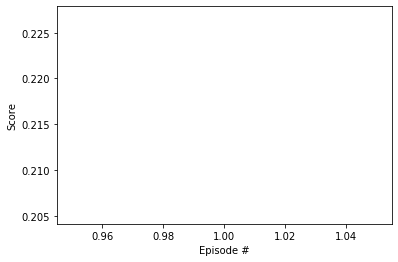

_BUFFER_SIZE         100000.0000
_BATCH_SIZE             128.0000
_GAMMA                    0.9900
_TAU                      0.0010
_LR_ACTOR                 0.0001
_LR_CRITIC                0.0001
_WEIGHT_DECAY             0.0000
_mu                       0.0000
_theta                    0.1500
_sigma                    0.1000
_actor_fc1_units        128.0000
_actor_fc2_units        128.0000
_critic_fc1_units       128.0000
_critic_fc2_units       128.0000
Name: 1, dtype: float64
Episode 5	Average Score: 0.11

KeyboardInterrupt: 

In [9]:
from tqdm import tqdm_notebook as tqdm

for index, row in tqdm(df_hyperparameters.iterrows()):
    print(row)
    agent = Agent(state_size, action_size, 2,
                int(row["_BUFFER_SIZE"]),
                int(row["_BATCH_SIZE"]),
                row["_GAMMA"],
                row["_TAU"],
                row["_LR_ACTOR"], 
                row["_LR_CRITIC"],
                row["_WEIGHT_DECAY"],
                row["_mu"],
                row["_theta"],
                row["_sigma"],
                int(row["_actor_fc1_units"]),
                int(row["_actor_fc2_units"]),
                int(row["_critic_fc1_units"]),
                int(row["_critic_fc2_units"]))
    plotscores(ddpg(agent, 30))

### Guess

LR for the critic granurality 


### Report version

Batch Normalized

In [10]:
_BUFFER_SIZE = int(1e5)  # replay buffer size
_BATCH_SIZE = 128        # minibatch size
_GAMMA = 0.90            # discount factor
_TAU = 1e-3              # for soft update of target parameters
_LR_ACTOR = 1e-4         # learning rate of the actor 
_LR_CRITIC = 1e-4        # learning rate of the critic
_WEIGHT_DECAY = 0        # L2 weight decay
_mu=0.                   # Ornstein-Uhlenbeck noise parameters
_theta=0.15              # Ornstein-Uhlenbeck noise parameters
_sigma=0.1               # Ornstein-Uhlenbeck noise parameters
_actor_fc1_units=64
_actor_fc2_units=32
_critic_fc1_units=64
_critic_fc2_units=32

In [11]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2,
    BUFFER_SIZE = _BUFFER_SIZE,  # replay buffer size
    BATCH_SIZE = _BATCH_SIZE,        # minibatch size
    GAMMA = _GAMMA,            # discount factor
    TAU = _TAU,              # for soft update of target parameters
    LR_ACTOR = _LR_ACTOR,         # learning rate of the actor 
    LR_CRITIC = _LR_CRITIC,        # learning rate of the critic
    WEIGHT_DECAY = _WEIGHT_DECAY,       # L2 weight decay
    mu = _mu,
    theta= _theta,
    sigma= _sigma)

Episode 100	Average Score: 10.84
Episode 150	Average Score: 10.66

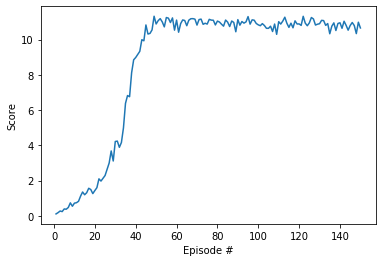

In [12]:
plotscores(ddpg(agent, 150))

### 4. Watch a Smart Agent!

In [13]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))



Total score (averaged over agents) this episode: 36.423499185871336


When finished, you can close the environment.

In [14]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```